In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree, preprocessing

In [2]:
dataset = "dataset.csv"
data = pd.read_csv(dataset)

In [3]:
data

,License,Drunk,Tired,Healthy,God,Deposit,Glasses,Clothes Color,Weight,Eat Beef,...,Hair,Watch,Hat,Member of Costco,Member of Ikea,Member of Carrefour,Use Gmail,Foreigner,Use Apple,Predict Class
0,True,True,False,True,False,728266,True,Blue,Normal,False,...,Short,False,True,True,False,False,False,False,False,True
1,True,False,False,True,False,370865,False,Yellow,Thin,True,...,Long,True,False,True,True,False,False,True,True,True
2,True,False,True,True,True,100798,True,Purple,Thin,False,...,No,False,False,False,False,False,False,False,False,True
3,True,True,False,True,False,116169,True,Red,Thin,False,...,No,True,True,True,False,True,True,False,True,True
4,False,True,False,True,False,443360,False,Black,Fat,True,...,Long,False,True,False,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,True,True,False,True,False,2139,True,Purple,Fat,True,...,No,True,True,False,True,True,True,False,False,False
496,True,False,True,True,True,232832,True,Blue,Normal,False,...,Long,False,False,False,True,True,False,True,True,True
497,True,True,True,False,False,173699,True,Black,Fat,False,...,Short,True,False,True,False,True,True,True,True,True
498,True,True,False,True,False,362283,True,Blue,Normal,False,...,Long,True,True,False,True,True,True,True,True,True


In [4]:
columns = list(data.columns)
encoder_cols = list(columns)
encoder_cols.remove("Deposit")

In [5]:
labelencoder = preprocessing.LabelEncoder()
for col in encoder_cols:
    data[col] = labelencoder.fit_transform(data[col])

In [6]:
data

,License,Drunk,Tired,Healthy,God,Deposit,Glasses,Clothes Color,Weight,Eat Beef,...,Hair,Watch,Hat,Member of Costco,Member of Ikea,Member of Carrefour,Use Gmail,Foreigner,Use Apple,Predict Class
0,1,1,0,1,0,728266,1,1,1,0,...,2,0,1,1,0,0,0,0,0,1
1,1,0,0,1,0,370865,0,6,2,1,...,0,1,0,1,1,0,0,1,1,1
2,1,0,1,1,1,100798,1,3,2,0,...,1,0,0,0,0,0,0,0,0,1
3,1,1,0,1,0,116169,1,4,2,0,...,1,1,1,1,0,1,1,0,1,1
4,0,1,0,1,0,443360,0,0,0,1,...,0,0,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,1,0,1,0,2139,1,3,0,1,...,1,1,1,0,1,1,1,0,0,0
496,1,0,1,1,1,232832,1,1,1,0,...,0,0,0,0,1,1,0,1,1,1
497,1,1,1,0,0,173699,1,0,0,0,...,2,1,0,1,0,1,1,1,1,1
498,1,1,0,1,0,362283,1,1,1,0,...,0,1,1,0,1,1,1,1,1,1


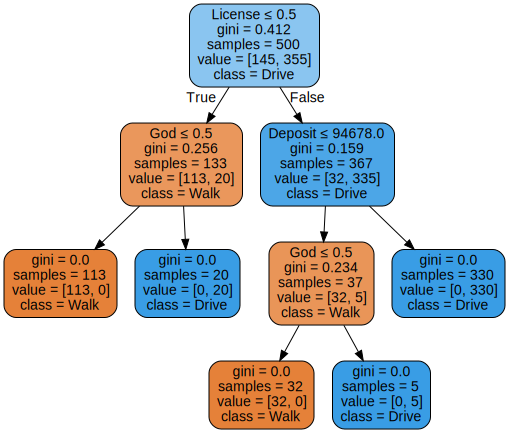

In [7]:
clf = tree.DecisionTreeClassifier(criterion="gini").fit(data[columns[:-1]], data[columns[-1]])
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=columns[:-1], class_names=["Walk", "Drive"], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph